In [1]:
#Import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
# to display stats about data
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [6]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#Preprocessing the dataset
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

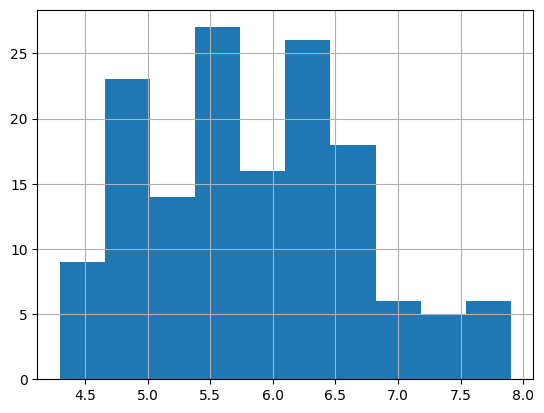

In [9]:
#Exploratory Data Analysis
# histograms
df['SepalLengthCm'].hist()

<Axes: >

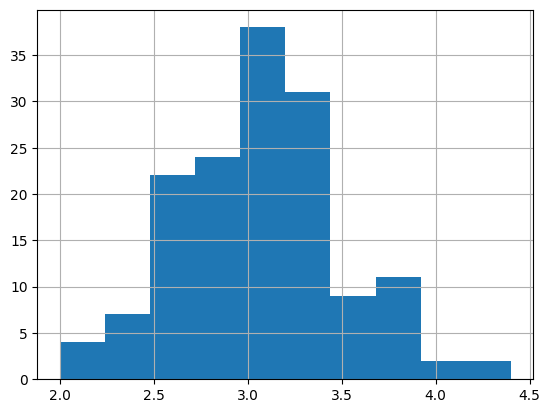

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

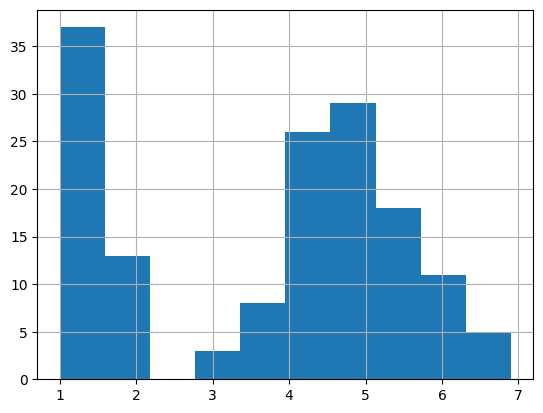

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

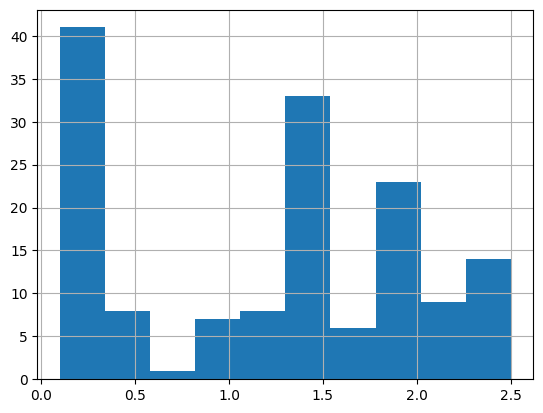

In [12]:
df['PetalWidthCm'].hist()

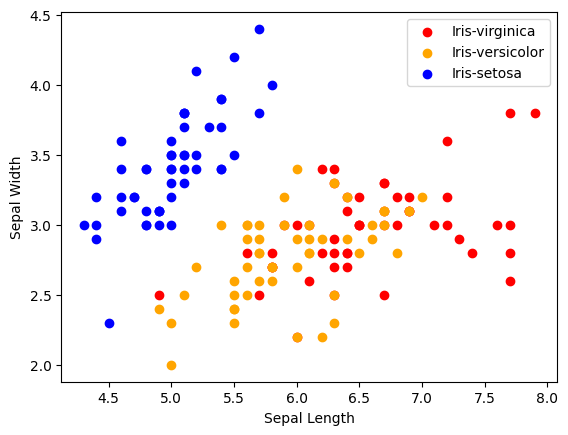

In [19]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

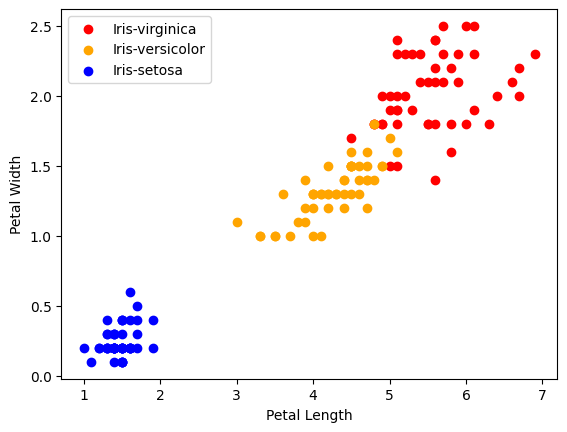

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

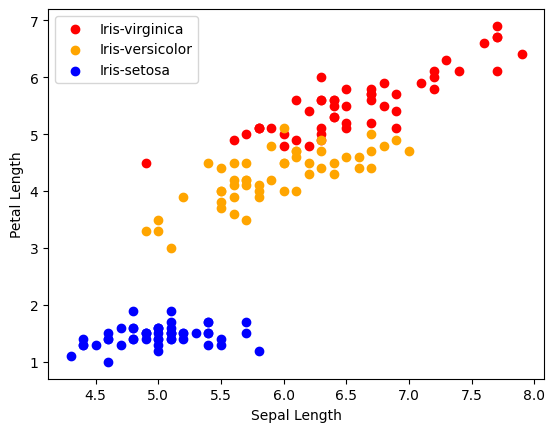

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()


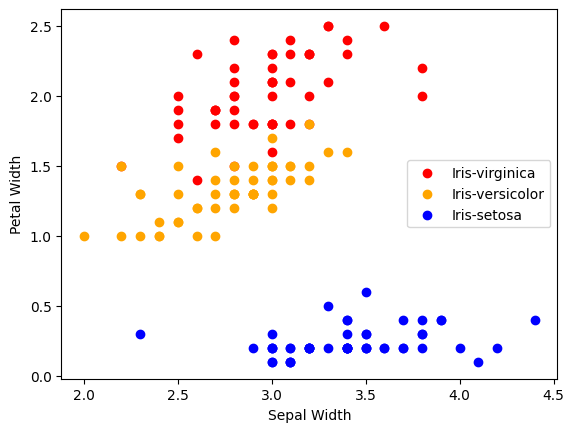

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [40]:
#Coorelation Matrix

#A correlation matrix is a table showing correlation coefficients between variables. 
#Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles 
#have high correlation, we can neglect one variable from those two.



<Axes: >

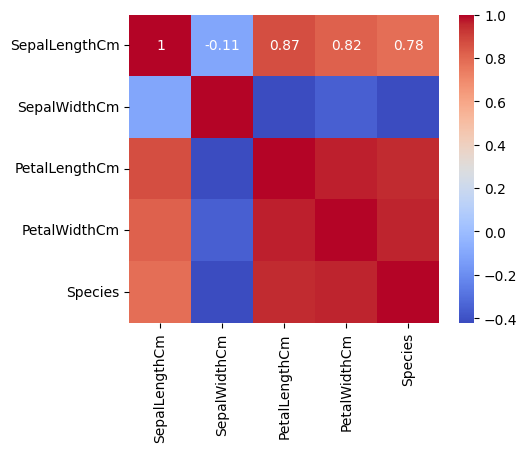

In [42]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [31]:
#Label Encoder

#In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [32]:
#Model Training
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [34]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [35]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [37]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [3]:
#sving model in pkl format for create GUI of it 
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset and split
X, Y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Train models
models = {
    'logistic_regression_model': LogisticRegression(max_iter=200),
    'knn_model': KNeighborsClassifier(),
    'decision_tree_model': DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(x_train, y_train)
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(model, f)

print("Models saved successfully!")


Models saved successfully!


In [ ]:
#GUI of project
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load models and LabelEncoder
models = [pickle.load(open(f'{model}.pkl', 'rb')) for model in ['logistic_regression_model', 'knn_model', 'decision_tree_model']]
le = LabelEncoder().fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Predict function
def predict_species():
    try:
        input_data = np.array([[float(sepal_length.get()), float(sepal_width.get()), 
                                float(petal_length.get()), float(petal_width.get())]])
        preds = [le.inverse_transform(model.predict(input_data))[0] for model in models]
        messagebox.showinfo("Prediction", "\n".join([f"{model.__class__.__name__}: {pred}" for model, pred in zip(models, preds)]))
    except ValueError:
        messagebox.showerror("Error", "Invalid input.")

# GUI setup
window = tk.Tk()
window.title("Iris Flower Prediction")
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
for i, label in enumerate(labels): tk.Label(window, text=label).grid(row=i, column=0)
sepal_length, sepal_width, petal_length, petal_width = [tk.Entry(window) for _ in range(4)]
for i, entry in enumerate([sepal_length, sepal_width, petal_length, petal_width]): entry.grid(row=i, column=1)

# Prediction button
tk.Button(window, text="Predict", command=predict_species).grid(row=4, columnspan=2)
window.mainloop()
